# Markdown Cell 1: Introduction to Proper Orthogonal Decomposition (POD)

'''
## Proper Orthogonal Decomposition (POD) for Dimensionality Reduction

In this notebook, we will implement Proper Orthogonal Decomposition (POD), also known as Principal Component Analysis (PCA), to reduce the dimensionality of our air quality dataset. POD/PCA is a linear dimensionality reduction technique that identifies principal components, which are orthogonal directions that capture the maximum variance in the data.

**Objective:**

To apply POD/PCA to the air quality dataset to reduce its dimensionality while retaining as much variance as possible. This helps in identifying the most important linear combinations of features that explain the data's variability, effectively achieving dimensionality reduction.

**Note:** For mean-centered data, POD is mathematically equivalent to PCA. We will mean-center our data before applying POD.
'''

In [1]:
# Code Cell 2: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Markdown Cell 3: Load and Prepare Data

'''
## 1. Load and Prepare Data

We will load the air quality dataset and prepare the features for POD/PCA. We will use the same feature set as in previous examples.

*   **Features:**
    *   'Daily Mean PM2.5 Concentration'
    *   'Daily AQI Value'
    *   'Daily Obs Count'
    *   'Percent Complete'
    *   'Site Latitude'
    *   'Site Longitude'

We will handle missing values, standardize the features (important for PCA), and explicitly mean-center the data to ensure POD equivalence to PCA if standardization doesn't fully mean-center.
'''

In [6]:
# Code Cell 4: Load and Prepare Data Implementation

file_path = '/home/roshan/Documents/code/ISRO/Dataset.csv' # Replace with your CSV file path
data = pd.read_csv(file_path)

features_for_pca = [
    'Daily Mean PM2.5 Concentration',
    'Daily AQI Value',
    'Daily Obs Count',
    'Percent Complete',
    'Site Latitude',
    'Site Longitude'
]

X = data[features_for_pca].copy()

# Handle missing values (filling with mean for simplicity)
X = X.fillna(X.mean())

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mean-center the data (explicitly for POD equivalence to PCA if not already mean-centered by StandardScaler)
X_mean_centered = X_scaled - np.mean(X_scaled, axis=0)

In [7]:
# Code Cell 6: Implement POD/PCA Implementation

n_components_pca = 2 # Reduce to 2 dimensions for visualization
pca = PCA(n_components=n_components_pca, random_state=0) # Set random_state for reproducibility

X_pca = pca.fit_transform(X_mean_centered) # Fit PCA on mean-centered data

Explained variance ratio for the first 2 components: [0.35675521 0.31606515]
Total explained variance for the first 2 components: 0.6728


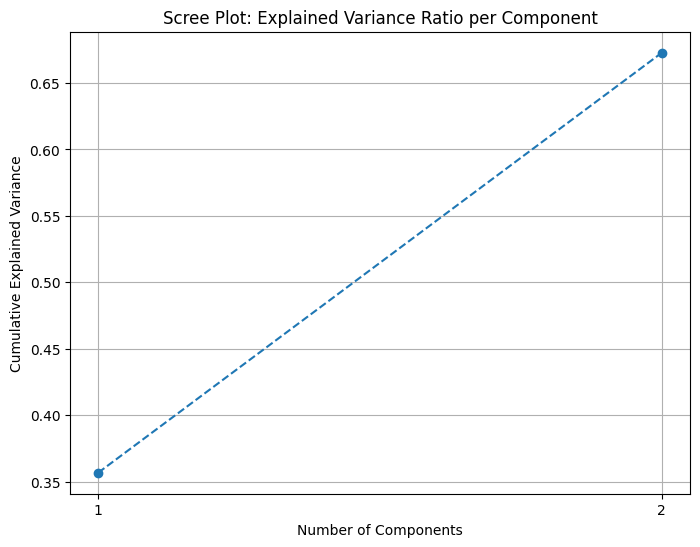

In [8]:
# Code Cell 8: Explained Variance Ratio Implementation

explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained variance ratio for the first {n_components_pca} components: {explained_variance_ratio}")
print(f"Total explained variance for the first {n_components_pca} components: {sum(explained_variance_ratio):.4f}")

# Optional: Scree plot to visualize explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components_pca + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Scree Plot: Explained Variance Ratio per Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, n_components_pca + 1))
plt.grid(True)
plt.show()

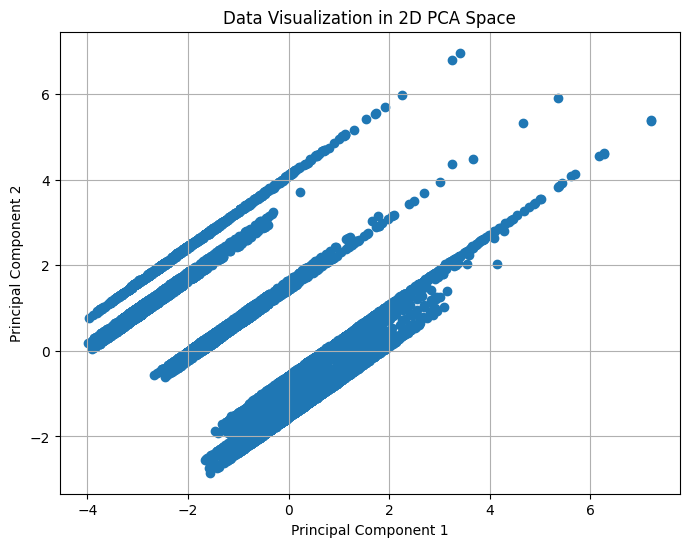

In [9]:
# Code Cell 10: Visualize Data in PCA Space Implementation

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1]) # PCA Component 1 vs Component 2
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization in 2D PCA Space')
plt.grid(True)
plt.show()